# Provision

In [2]:
from blocksnet import City, Provision, ProvisionMethod

city = City.from_pickle('../data/model.pickle')

In [3]:
provision = Provision(city_model=city)
service_type = city['school']
result = provision.calculate(service_type, method=ProvisionMethod.GRAVITATIONAL)

2025-02-06 00:09:30.219 | INFO     | blocksnet.method.provision:_lp_provision:321 - Setting an LP problem for accessibility = 15 : 4591x565
2025-02-06 00:09:53.532 | INFO     | blocksnet.method.provision:_lp_provision:355 - Solving the problem
2025-02-06 00:09:54.224 | INFO     | blocksnet.method.provision:_lp_provision:359 - Restoring values from variables
2025-02-06 00:09:55.738 | INFO     | blocksnet.method.provision:_lp_provision:321 - Setting an LP problem for accessibility = 30 : 2839x67
2025-02-06 00:09:57.591 | INFO     | blocksnet.method.provision:_lp_provision:355 - Solving the problem
2025-02-06 00:09:57.689 | INFO     | blocksnet.method.provision:_lp_provision:359 - Restoring values from variables
2025-02-06 00:09:57.907 | INFO     | blocksnet.method.provision:_lp_provision:321 - Setting an LP problem for accessibility = 45 : 2540x10
2025-02-06 00:09:58.171 | INFO     | blocksnet.method.provision:_lp_provision:355 - Solving the problem
2025-02-06 00:09:58.211 | INFO     | b

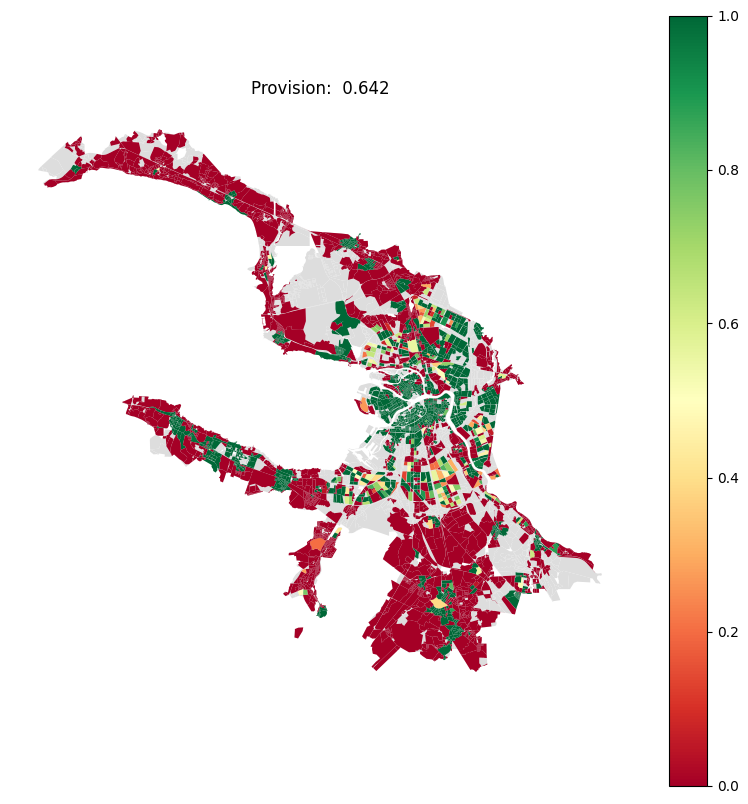

In [4]:
provision.plot(result, figsize=(10,10))

## Update scenario (negative)

In [8]:
import pandas as pd

update = {
  5519: {
    'population': 10_000
  }
}

update_df = pd.DataFrame.from_dict(update, 'index')
update_df

,population
5519,10000


In [5]:
upd_result = provision.calculate(service_type, update_df)

2025-02-06 00:08:07.966 | INFO     | blocksnet.method.provision:_lp_provision:321 - Setting an LP problem for accessibility = 15 : 4591x565
2025-02-06 00:08:30.348 | INFO     | blocksnet.method.provision:_lp_provision:355 - Solving the problem
2025-02-06 00:08:31.109 | INFO     | blocksnet.method.provision:_lp_provision:359 - Restoring values from variables
2025-02-06 00:08:32.514 | INFO     | blocksnet.method.provision:_lp_provision:321 - Setting an LP problem for accessibility = 30 : 2854x67
2025-02-06 00:08:34.273 | INFO     | blocksnet.method.provision:_lp_provision:355 - Solving the problem
2025-02-06 00:08:34.383 | INFO     | blocksnet.method.provision:_lp_provision:359 - Restoring values from variables
2025-02-06 00:08:34.605 | INFO     | blocksnet.method.provision:_lp_provision:321 - Setting an LP problem for accessibility = 45 : 2548x10
2025-02-06 00:08:34.866 | INFO     | blocksnet.method.provision:_lp_provision:355 - Solving the problem
2025-02-06 00:08:34.908 | INFO     | b

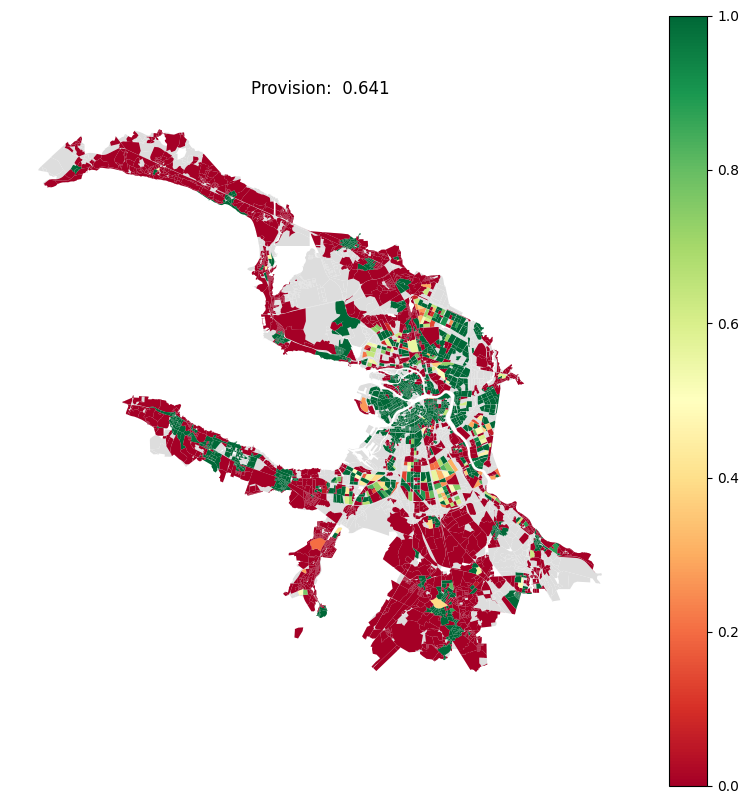

In [6]:
provision.plot(upd_result, figsize=(10,10))

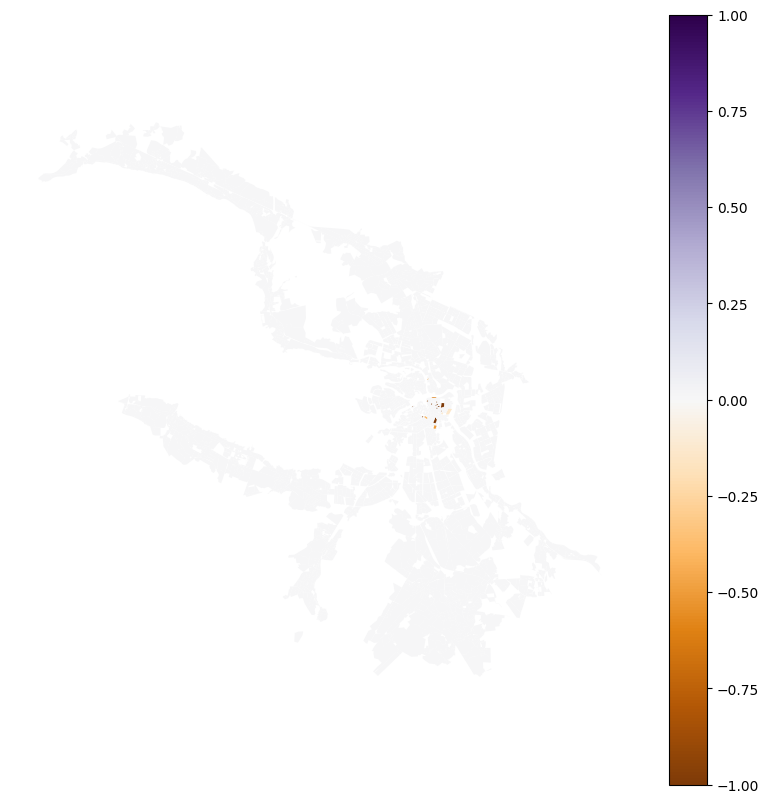

In [7]:
delta_result = upd_result.copy()
delta_result['provision'] -= result['provision']
delta_result.plot(
  column='provision', 
  vmin=-1, 
  vmax=1, 
  legend=True, 
  linewidth=0.1, 
  figsize=(10,10),
  cmap="PuOr"
).set_axis_off()

## Update scenario (positive)

In [13]:
update = {
  1186: {
    'school': 2_000
  }
}

update_df = pd.DataFrame.from_dict(update, 'index')
update_df

,school
1186,2000


In [14]:
upd_result = provision.calculate(service_type, update_df)

2025-02-06 00:13:00.319 | INFO     | blocksnet.method.provision:_lp_provision:321 - Setting an LP problem for accessibility = 15 : 4591x565
2025-02-06 00:13:23.129 | INFO     | blocksnet.method.provision:_lp_provision:355 - Solving the problem
2025-02-06 00:13:23.819 | INFO     | blocksnet.method.provision:_lp_provision:359 - Restoring values from variables
2025-02-06 00:13:25.258 | INFO     | blocksnet.method.provision:_lp_provision:321 - Setting an LP problem for accessibility = 30 : 2838x67
2025-02-06 00:13:27.003 | INFO     | blocksnet.method.provision:_lp_provision:355 - Solving the problem
2025-02-06 00:13:27.102 | INFO     | blocksnet.method.provision:_lp_provision:359 - Restoring values from variables
2025-02-06 00:13:27.322 | INFO     | blocksnet.method.provision:_lp_provision:321 - Setting an LP problem for accessibility = 45 : 2539x10
2025-02-06 00:13:27.586 | INFO     | blocksnet.method.provision:_lp_provision:355 - Solving the problem
2025-02-06 00:13:27.626 | INFO     | b

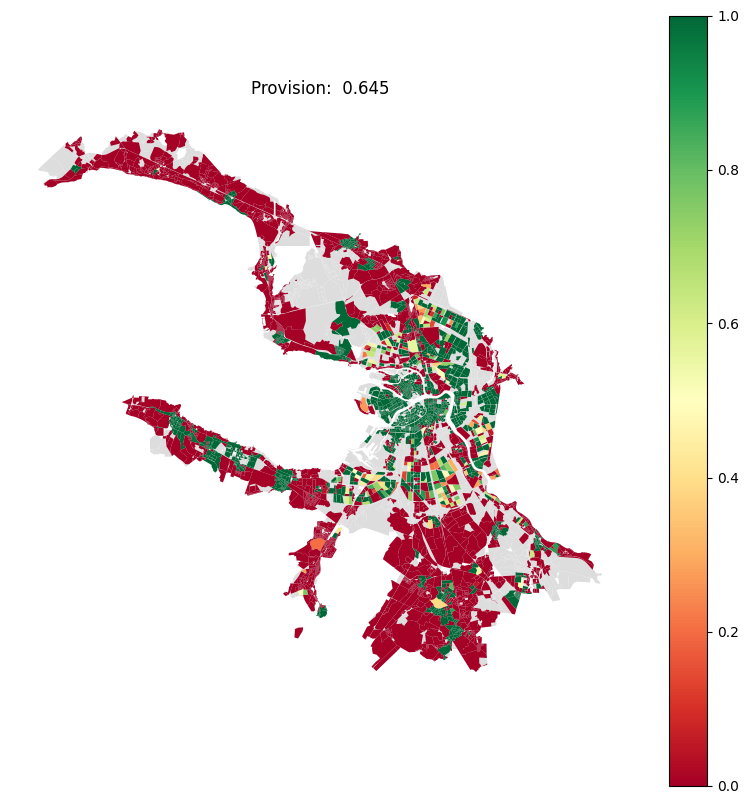

In [15]:
provision.plot(upd_result, figsize=(10,10))

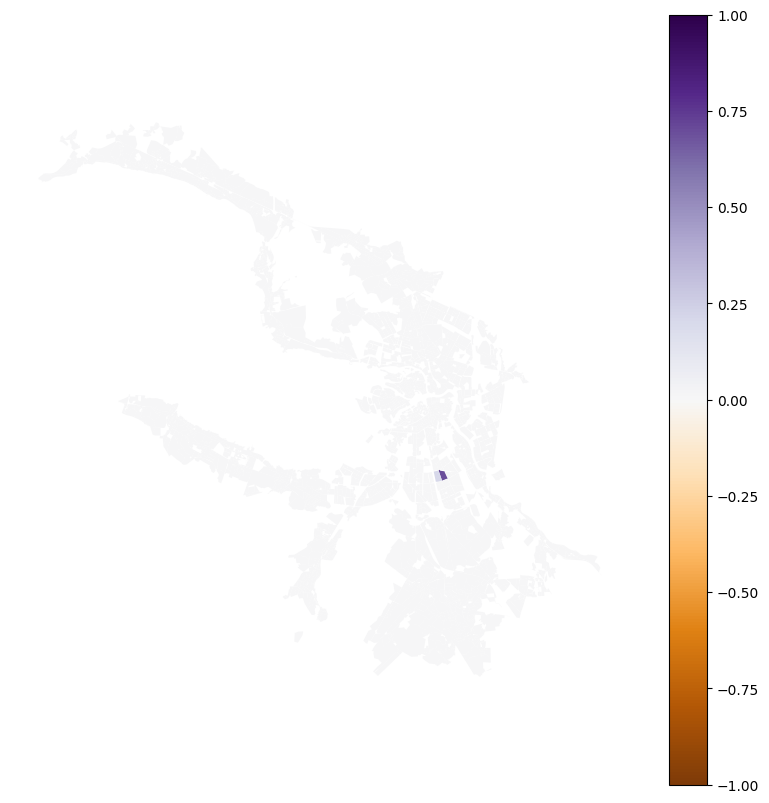

In [16]:
delta_result = upd_result.copy()
delta_result['provision'] -= result['provision']
delta_result.plot(
  column='provision', 
  vmin=-1, 
  vmax=1, 
  legend=True, 
  linewidth=0.1, 
  figsize=(10,10),
  cmap="PuOr"
).set_axis_off()

## Some utilities

Statistics to help user understand the results

In [9]:
provision.stat(result)

{'mean': 0.4047230817176672, 'median': 0.0, 'min': 0.0, 'max': 1.0}

Overall provision assessment

In [10]:
provision.total(result)

0.6416307100358951

Lower and upper bounds of possible provision assessment based on blocks capacities and demands

In [11]:
provision.get_bounds(service_type)

(0.3889247430791169, 0.6996023258100998)